# Сегментация покупателей интернет-магазина по профилю потребления

**Заголовок:** Сегментация покупателей интернет-магазина по профилю потребления.

**Описание проекта:** Интернет-магазин товаров для дома «Пока все ещё тут» в срочном порядке ищет аналитиков. Задача — выявление профилей покупателей, а также полноценный анализ товарного ассортимента.

**Цели исследования:**
- **Рекомендации по маркетингу** - исходя из анализа сегментов покупателей, разработать рекомендации о том, каким клиентам и когда следует рассылать рекламные предложения о каких категориях товаров.
- **Стратегия увеличения продаж** - разработать стратегию по увеличению количества продаваемого товара для каждого сегмента.
- **Стратегия повышения лояльности** - предложить способы повышения возвращаемости покупателей для различных сегментов.

**Ход исследования:**
- Для проведения исследования откроем необходимый файл с данными.
- Изучим его и, при необходимости, проведем предобработку данных.
- После этого можно будет приступать к анализу. Анализ будет сопровождаться графической визуализацией и небольшими выводами после каждого пункта.
- После проведения анализа приступим к сегментированию, чтобы выполнить цели исследования.
- Сформулируем некоторые гипотезы, и проверим их.
- После этого постараемся сформулировать для заказчика рекомендации.

**Общий вывод:** чтобы обосновать рекомендации, подготовим для заказчика презентацию с основными тезисами и общим выводом.

После данного исследования мы сможем сформировать профили покупателей для увеличения объемов продаж интернет-магазина и эффективного привлечения покупателей.

Перед тем, как приступить к исследованию, подключим все необходимые библиотеки.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re
from scipy.stats import mannwhitneyu
pd.options.display.max_colwidth = 100

## Загрузка данных и изучение общей информации

Загрузим данные и изучим их.

In [ ]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Мы видим, что в датасете 7474 строк и 6 столбцов. В столбцах содержится следующие данные:
- `date` — дата заказа
- `customer_id` — идентификатор покупателя
- `order_id` — идентификатор заказа
- `product` — наименование товара
- `quantity` — количество товара в заказе
- `price` — цена товара

Уже на этом этапе можно заметить, что пропусков в данных не обнаружено. Также, в столбце с датой заказа необходимо установить корректный тип данных. Перейдем к предобработке данных.

## Предобработка данных

### Изменение типа данных в столбцах

Изменим тип данных в столбце `date` с *int64* на *datetime.*

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         7474 non-null   datetime64[ns]
 1   customer_id  7474 non-null   object        
 2   order_id     7474 non-null   int64         
 3   product      7474 non-null   object        
 4   quantity     7474 non-null   int64         
 5   price        7474 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 350.5+ KB


,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0


Готово, теперь проверим данные на наличие/отсутствие дубликатов.

### Проверка на дубликаты

Сначала проведем проверку явных дубликатов.

In [ ]:
data.duplicated().sum()

0

Явные дубликаты не обнаружены, поэтому проверим неявные.

In [ ]:
data[data[['customer_id', 'order_id', 'product', 'quantity', 'price']].duplicated(keep=False)]

,date,customer_id,order_id,product,quantity,price
15,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарным покрытием 12 см, LG17085",1,239.0
16,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытием MARBLE ALPENKOK d = 26 см AK-0039A/26N,1,824.0
17,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см AK-26GL,1,262.0
18,2018-10-01 18:00:00,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0
19,2018-10-01 21:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
...,...,...,...,...,...,...
6716,2019-10-30 07:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6717,2019-10-30 09:00:00,344aa778-e436-419e-a9c6-9b8f37b7c1df,73137,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6728,2019-10-31 00:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0
6729,2019-10-31 02:00:00,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0


Теперь удалим найденные дубликаты, оставив последнее по времени (самое актуальное) уникальное значение, и проверим корректность удаления.

In [ ]:
data_new = (data.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'],
                                 keep='last')
                .reset_index(drop=True))
data_new[data_new[['customer_id', 'order_id', 'product', 'quantity', 'price']].duplicated(keep=False)]

,date,customer_id,order_id,product,quantity,price


Неявных дубликатов не осталось, проверим размер датафрейма после обработки.

In [ ]:
data_new

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
5605,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0
5606,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
5607,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0
5608,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0


После удаления неявных дубликатов, в датафрейме осталось 5610 строк. Проверим, какое количество данных осталось.

In [ ]:
len(data_new)/len(data) * 100

75.06020872357506

После обработки осталось **75% данных.** Соответственно, 25% было удалено.

Перед началом анализа данных проверим также данные на наличие аномалий.

### Проверка данных на аномалии

#### Проверка на заказы с несколькими покупателями

In [ ]:
data_new.groupby('order_id', as_index=False).agg({'customer_id': 'nunique'}).query('customer_id > 1')

,order_id,customer_id
248,14872,2
516,68785,2
797,69283,2
817,69310,2
832,69345,2
862,69410,2
902,69485,3
933,69531,2
1066,69833,2
1200,70114,2


Да, такие заказы существуют, и их несколько. Обработаем их точно так же, оставив последнее по времени значение, и проверим корректность обработки.

In [ ]:
many_customers = data_new.groupby('order_id').agg({'customer_id': 'nunique'}).query('customer_id > 1').index.tolist()

customers_to_drop = []

for i in data_new['order_id'].unique():
    if i in many_customers:
        duplicates_customers = data_new[data_new['order_id'] == i].index[:-1]
        customers_to_drop.extend(duplicates_customers)

data_new = data_new.drop(customers_to_drop).reset_index(drop=True)
data_new.groupby('order_id', as_index=False).agg({'customer_id': 'nunique'}).query('customer_id > 1')

,order_id,customer_id


Больше в датафрейме таких заказов нет. Проверим размерность данных после удаления.

In [ ]:
data_new

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
5568,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0
5569,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
5570,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0
5571,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0


Таким образом, из датафрейма было **удалено 37 строк.** Также, необходимо проверить, есть ли заказы с разными датами.

#### Проверка на заказы с разными датами

In [ ]:
data_new.groupby('order_id', as_index=False).agg({'date': 'nunique'}).query('date > 1')

,order_id,date
14,14500,2
41,14541,2
108,14649,2
221,14833,2
266,14897,2
502,68760,3
533,68814,2
796,69282,2
931,69527,2
1031,69750,2


Такие заказы также существуют. Оставим заказы с последним уникальным значением даты для обработки таких аномалий, и проверим корректность обработки.

In [ ]:
last_dates = data_new.groupby('order_id')['date'].max().reset_index()

data_new = data_new.merge(last_dates, on=['order_id', 'date'])
data_new.groupby('order_id', as_index=False).agg({'date': 'nunique'}).query('date > 1')

,order_id,date


Аномальные заказы удалены. Проверим размерность данных после удаления.

In [ ]:
data_new

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
5510,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0
5511,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
5512,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0
5513,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0


Из датафрейма было **удалено еще 58 строк.** Теперь проверим данные на аномалии по чеку покупки.

#### Проверка чеков покупок на аномальные значения

Для проверки на аномалии рассчитаем чеки покупок и создадим отдельный столбец, где эти значения будут отражены.

In [ ]:
data_new['revenue'] = data_new['quantity'] * data_new['price']
data_new

,date,customer_id,order_id,product,quantity,price,revenue
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0
...,...,...,...,...,...,...,...
5510,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0,76.0
5511,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0
5512,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0,354.0
5513,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0,128.0


Столбец был создан корректно, теперь проверим, есть ли у нас аномальные значения.

In [ ]:
(
    data_new.groupby('date', as_index=False)['revenue'].max()
    .sort_values(by='revenue', ascending=False).reset_index(drop=True)
)

,date,revenue
0,2019-06-18 15:00:00,675000.0
1,2019-06-11 07:00:00,49432.0
2,2019-01-15 13:00:00,47385.0
3,2018-12-21 16:00:00,32718.0
4,2018-11-29 17:00:00,29248.0
...,...,...
2715,2019-12-18 15:00:00,11.0
2716,2020-01-05 22:00:00,11.0
2717,2020-01-12 19:00:00,10.0
2718,2019-12-17 09:00:00,10.0


Мы обнаружили чрезмерно высокое значение **18 июня 2019.** Для точного определения, является ли это значение выбросом, от которого необходимо избавиться, и поиска других возможных значений выбросов, построим диаграмму размаха.

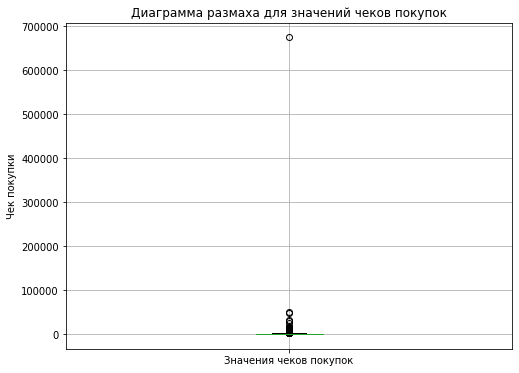

In [ ]:
plt.figure(figsize=(8, 6))
data_new.boxplot(column='revenue')

plt.title('Диаграмма размаха для значений чеков покупок')
plt.ylabel('Чек покупки')
plt.xticks([1], ['Значения чеков покупок'])
plt.show()

Это значение, а также некоторые другие, являются выбросами, удалим их через определение процентиля.

In [ ]:
percentile_revenue_99 = data_new['revenue'].quantile(0.999)
print("99.9 процентиль:", percentile_revenue_99)

data_new = data_new.query('revenue <= @percentile_revenue_99')
(
    data_new.groupby('date', as_index=False)['revenue'].max()
    .sort_values(by='revenue', ascending=False).reset_index(drop=True)
)

99.9 процентиль: 20343.324000006156


,date,revenue
0,2019-02-04 06:00:00,16536.0
1,2019-04-19 19:00:00,15680.0
2,2019-12-31 10:00:00,15358.0
3,2019-05-20 21:00:00,15300.0
4,2019-07-29 17:00:00,14917.0
...,...,...
2711,2019-11-22 04:00:00,11.0
2712,2019-12-18 15:00:00,11.0
2713,2019-12-27 22:00:00,10.0
2714,2020-01-12 19:00:00,10.0


Удаление произошло корректно, теперь посмотрим на значения количества товаров, вдруг и там есть выбросы.

#### Проверка количества товаров на выбросы

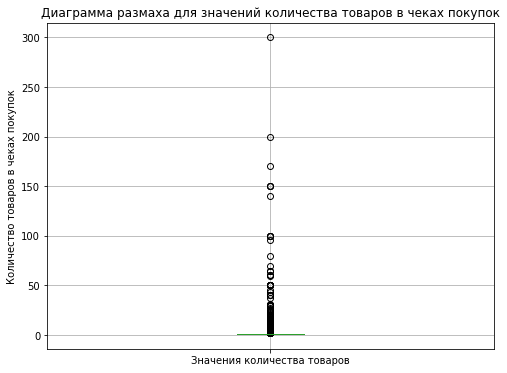

In [ ]:
plt.figure(figsize=(8, 6))
data_new.boxplot(column='quantity')

plt.title('Диаграмма размаха для значений количества товаров в чеках покупок')
plt.ylabel('Количество товаров в чеках покупок')
plt.xticks([1], ['Значения количества товаров'])
plt.show()

Мы нашли несколько нетипичных значений, выбивающихся из общего ряда. Удалим эти значения.

In [ ]:
percentile_quantity_99 = data_new['quantity'].quantile(0.999)
print("99.9 процентиль:", percentile_quantity_99)

data_new = data_new.query('quantity <= @percentile_quantity_99')

(
    data_new.groupby('date', as_index=False)['quantity'].max()
    .sort_values(by='quantity', ascending=False).reset_index(drop=True)
)

99.9 процентиль: 144.9200000000019


,date,quantity
0,2018-11-02 11:00:00,140
1,2019-10-28 10:00:00,100
2,2018-12-04 17:00:00,100
3,2019-01-21 09:00:00,100
4,2019-10-07 11:00:00,100
...,...,...
2709,2019-03-21 10:00:00,1
2710,2019-03-20 23:00:00,1
2711,2019-03-20 22:00:00,1
2712,2019-03-20 21:00:00,1


Аномалии были обнаружены и удалены. Теперь можно приступать к исследовательскому анализу данных.

## Исследовательский анализ данных

В анализе данных мы будем определять выручку и ее динамику, средний чек и его динамику, помесячную среднюю выручку с покупателя и ее динамику. Затем проведем категоризацию товаров, и рассчитаем выручку в разрезе категорий.

### Расчет выручки и определение ее динамики

Для проведения исследования создадим новый столбец:
- период `period` - усекаем даты до месяцев

In [ ]:
data_new['period'] = data_new['date'].dt.to_period('M')
data_new

,date,customer_id,order_id,product,quantity,price,revenue,period
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,2018-10
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10
...,...,...,...,...,...,...,...,...
5510,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0,76.0,2020-01
5511,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01
5512,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0,354.0,2020-01
5513,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0,128.0,2020-01


Создадим новую таблицу, которую сгруппируем по дате и заказу, и посчитаем чек покупки для каждого заказа.

In [ ]:
check_sum = (data_new.groupby(['period', 'order_id'], as_index=False)
                     .agg({'quantity': 'sum', 'price': 'sum', 'revenue': 'sum'}))
check_sum

,period,order_id,quantity,price,revenue
0,2018-10,14480,3,359.0,359.0
1,2018-10,14481,4,600.0,600.0
2,2018-10,14482,2,376.0,376.0
3,2018-10,14485,4,507.0,676.0
4,2018-10,14486,10,1692.0,1880.0
...,...,...,...,...,...
3506,2020-01,112601,1,134.0,134.0
3507,2020-01,112635,1,2399.0,2399.0
3508,2020-01,112657,1,149.0,149.0
3509,2020-01,112691,1,539.0,539.0


Теперь, для расчета выручки и отображения ее динамики, из этой таблицы сгруппируем сумму чеков покупки по дате.

In [ ]:
revenue = check_sum.groupby('period', as_index=False).agg({'revenue': 'sum'}).round(0)
print('Общее количество выручки за отчетный период равно:', round(revenue['revenue'].sum()))
revenue.sort_values(by='revenue', ascending=False).reset_index(drop=True)

Общее количество выручки за отчетный период равно: 3695448


,period,revenue
0,2018-10,332539.0
1,2019-04,316183.0
2,2018-12,305158.0
3,2019-02,304054.0
4,2018-11,297484.0
5,2019-03,252704.0
6,2019-07,225526.0
7,2019-05,213557.0
8,2019-10,212040.0
9,2019-12,202885.0


Самыми прибыльными месяцами оказались:
- **октябрь 2018: 332539**
- **апрель 2019: 316183**
- **декабрь 2018: 305158**
- **февраль 2019: 304054**

Самым неприбыльным оказался **ноябрь 2019 - 128792.**

Общее количество выручки за отчетный период равно **3 695 448.** Теперь построим столбчатую диаграмму для отображения динамики.

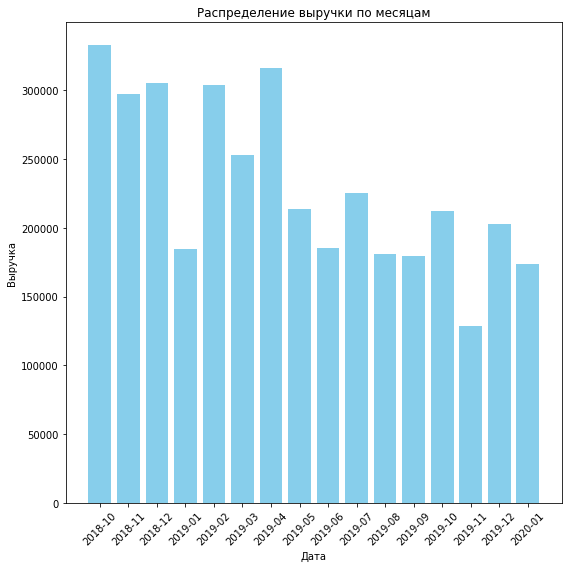

In [ ]:
plt.figure(figsize=(8, 8))
plt.bar(revenue['period'].astype(str), revenue['revenue'], color='skyblue')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Распределение выручки по месяцам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Мы видим самые высокие значения **осенью 2018 (октябрь, ноябрь) и зимой-весной 2018-2019 гг. (декабрь, февраль, март, апрель).** Это можно объяснить новогодними и весенними праздниками. В **декабре 2019-январе 2020 гг.** можно тоже увидеть этот тренд.

Теперь рассчитаем средний чек и его динамику.

### Расчет среднего чека и определение его динамики

Средний чек рассчитывается следующим методом: выручку необходимо поделить на количество уникальных заказов (не товаров). Поэтому, сгруппируем датафрейм по дате, рассчитаем количество уникальных заказов и сумму выручки, а затем методом деления посчитаем средний чек заказа.

In [ ]:
avg_check = data_new.groupby('period', as_index=False).agg({'order_id': 'nunique', 'revenue': 'sum'})
avg_check['avg'] = (avg_check['revenue'] / avg_check['order_id']).round(0)
print('Средний чек за отчетный период равен:', round(avg_check['avg'].mean()))
avg_check.sort_values(by='avg', ascending=False).reset_index(drop=True)

Средний чек за отчетный период равен: 1062


,period,order_id,revenue,avg
0,2018-11,202,297484.000000,1473.0
1,2018-10,236,332539.000000,1409.0
2,2019-04,265,316183.000000,1193.0
3,2019-05,179,213557.000000,1193.0
4,2019-06,162,185641.000000,1146.0
5,2019-07,197,225526.000000,1145.0
6,2019-01,165,184272.000000,1117.0
7,2018-12,277,305158.000000,1102.0
8,2019-02,288,304054.000000,1056.0
9,2019-08,175,181231.000000,1036.0


Самый высокий средний чек по месяцам:
- **ноябрь 2018: 1473**
- **октябрь 2018: 1409**

Самым низким средний чек оказался в **ноябре 2019 - 594.**

Средний чек за отчетный период равен **1062.** Теперь построим график для визуализации полученных значений.

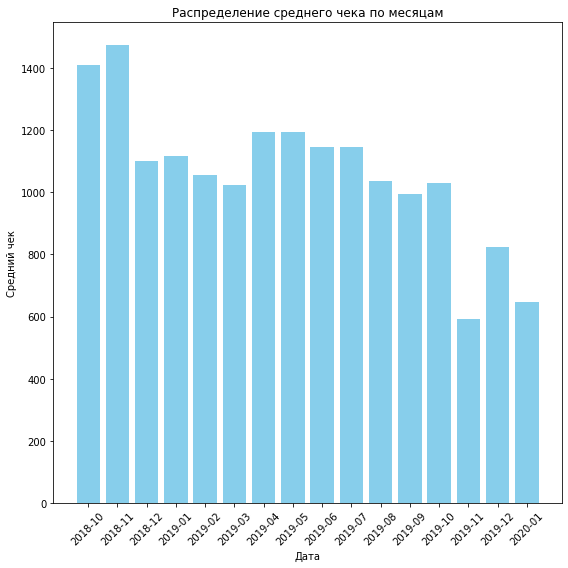

In [ ]:
plt.figure(figsize=(8, 8))
plt.bar(avg_check['period'].astype(str), avg_check['avg'], color='skyblue')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Распределение среднего чека по месяцам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Средний чек показывает максимальные значения в **октябре-ноябре 2018 г.,** что подтверждает предположение об активности покупателей ввиду новогодних праздников.

Теперь посчитаем динамику средней выручки с одного покупателя.

### Расчет помесячной динамики средней выручки с покупателя

In [ ]:
avg_customer = data_new.groupby('period', as_index=False).agg({'customer_id': 'nunique', 'revenue': 'sum'})
avg_customer['avg'] = (avg_customer['revenue'] / avg_customer['customer_id']).round(0)
print('Средняя выручка с покупателя за отчетный период равна:', round(avg_customer['avg'].mean()))
avg_customer.sort_values(by='avg', ascending=False).reset_index(drop=True)

Средняя выручка с покупателя за отчетный период равна: 1183


,period,customer_id,revenue,avg
0,2018-10,177,332539.000000,1879.0
1,2018-11,176,297484.000000,1690.0
2,2018-12,227,305158.000000,1344.0
3,2019-04,236,316183.000000,1340.0
4,2019-05,165,213557.000000,1294.0
5,2019-02,246,304054.000000,1236.0
6,2019-01,150,184272.000000,1228.0
7,2019-06,152,185641.000000,1221.0
8,2019-07,185,225526.000000,1219.0
9,2019-10,177,212040.000000,1198.0


Самая высокая средняя выручка с покупателя по месяцам:
- **октябрь 2018: 1879**
- **ноябрь 2018: 1690**

Самая низкая средняя выручка с покупателя по месяцам:
- **декабрь 2019: 825**
- **январь 2020: 647**
- **ноябрь 2019: 594**

Средняя выручка с покупателя за отчетный период равна **1183.** Визуализируем полученные значения.

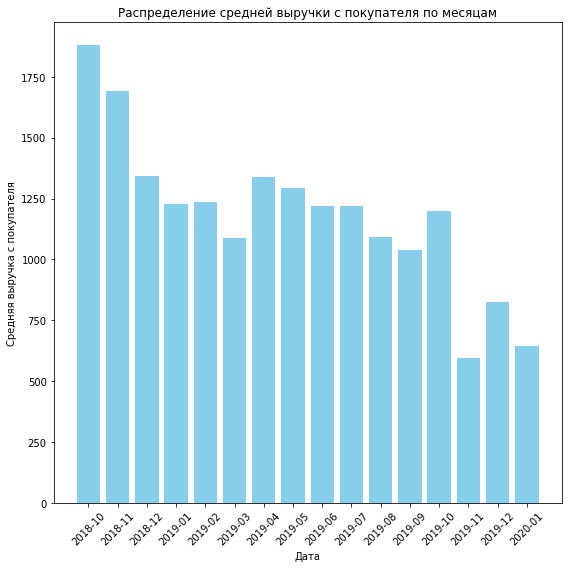

In [ ]:
plt.figure(figsize=(8, 8))
plt.bar(avg_customer['period'].astype(str), avg_customer['avg'], color='skyblue')
plt.xlabel('Дата')
plt.ylabel('Средняя выручка с покупателя')
plt.title('Распределение средней выручки с покупателя по месяцам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Опять же, максимальные значения определены в **октябре-ноябре 2018 г.**

В целом, мы уже можем увидеть закономерность: очевидно, что интернет-магазин теряет покупателей, а значит и выручку, так как в начале отчетного периода все рассчитанные показатели выше, чем в конце. Это значит, что в заключении исследования нам необходимо сформулировать рекомендации для заказчика, чтобы эффективнее удерживать старых покупателей и привлекать новых.

Теперь, проведем категоризацию товаров, и исследуем данные в разрезе категорий.

### Категоризация товаров

Для категоризации товаров посчитаем количество уникальных значений названий.

In [ ]:
data_new['product'].nunique()

2332

Значений очень много, и тяжело такое количество категоризировать. Чтобы упростить задачу, создадим функцию, которая оставит первое слово в названии, чтобы немного сгруппировать товары, и сузить количество уникальных значений.

In [ ]:
def one_word(product):
    word = re.findall(r'[а-яА-ЯёЁ]+', product)
    return ' '.join(word[:1])

Теперь создадим новый столбец с первым словом каждого товара.

In [ ]:
data_new['product_word'] = data_new['product'].apply(one_word)
data_new

,date,customer_id,order_id,product,quantity,price,revenue,period,product_word
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10,Комнатное
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,2018-10,Комнатное
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,Радермахера
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10,Хризолидокарпус
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10,Циперус
...,...,...,...,...,...,...,...,...,...
5510,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0,76.0,2020-01,томата
5511,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01,Дендробиум
5512,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0,354.0,2020-01,Подставка
5513,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0,128.0,2020-01,Тагетис


Посчитаем теперь количество уникальных значений.

In [ ]:
data_new['product_word'].nunique()

441

Уникальные значения снизились где-то в 5 раз, и теперь категоризировать товары станет намного проще. Теперь, выведем на экран все уникальные значения по новому столбцу.

In [ ]:
data_new['product_word'].unique()

array(['Комнатное', 'Радермахера', 'Хризолидокарпус', 'Циперус',
       'Шеффлера', 'Юкка', 'Настенная', 'Таз', 'Чехол', 'Вешалка',
       'Сушилка', 'Крючок', 'Корзина', 'Сумка', 'Многолетнее', 'Рассада',
       'Муляж', 'Щетка', 'Тарелка', 'Вилка', 'Ложка', 'Нож', 'Герань',
       'Ерш', 'Пеларгония', 'Котел', 'Суккулент', 'Эхеверия', 'Доска',
       'Набор', 'Коврик', 'Подкладка', 'Дозатор', 'Ёрш', 'Цветок',
       'Эвкалипт', 'Мусорный', 'Плед', 'Скатерть', 'Кувшин', 'Адиантум',
       'Ковер', 'Перчатки', 'Стремянка', 'Гладильная', 'Лестница',
       'Толкушка', 'Тележка', 'Готовая', 'Искусственный', 'Простыня',
       'Чайник', 'Штора', 'Банка', 'Стяжка', 'Комплект', 'Кампанула',
       'Декоративная', 'Противень', 'Калатея', 'Нолина', 'Плечики',
       'Подушка', 'Полотенце', 'Хлорофитум', 'Цикламен', 'Глоксиния',
       'Азалия', 'Гортензия', 'Хризантема', 'Петля', 'Стеклянная',
       'Салфетка', 'Вкладыши', 'Миксер', 'Кофр', 'Стиральный', 'Чистящий',
       'мокружка', 'Мирт'

Теперь создадим словарь с 5 категорями:
- растения и цветы
- товары для дома
- кухонные принадлежности
- принадлежности для ванной и уборки
- декор и подарочные товары

In [ ]:
categories = {
    'Растения и цветы': [
        'Комнатное', 'Радермахера', 'Хризолидокарпус', 'Циперус', 'Шеффлера', 'Юкка', 'Многолетнее', 'Рассада', 'Герань',
        'Пеларгония', 'Суккулент', 'Эхеверия', 'Цветок', 'Эвкалипт', 'Адиантум', 'Искусственный', 'Кампанула', 'Декоративная',
        'Калатея', 'Нолина', 'Хлорофитум', 'Цикламен', 'Глоксиния', 'Азалия', 'Гортензия', 'Хризантема', 'Мирт', 'Цветущее',
        'Кориандр', 'Иссоп', 'Сантолина', 'Аспарагус', 'Афеляндра', 'Антуриум', 'Молодило', 'Фиалка', 'Гербера', 'Душица',
        'Мелисса', 'Роза', 'Бегония', 'Розмарин', 'Альбука', 'Бальзамин', 'Крассула', 'Артемизия', 'Лаванда', 'Мята',
        'Каланхое', 'Примула', 'Дендробиум', 'Калоцефалус', 'Каллуна', 'Капсикум', 'Мимоза', 'Соланум', 'Бархатцы', 'Космея',
        'Морковь', 'Настурция', 'Огурец', 'Петуния', 'Алиссум', 'Гвоздика', 'Годеция', 'Календула', 'Капуста', 'Кореопсис',
        'Лапчатка', 'Львиный', 'Флокс', 'Цинерария', 'Эшшольция', 'Диффенбахия', 'Фаленопсис', 'Подсолнечник', 'Пуансетия',
        'Гиностемма', 'Ель', 'Кипарисовик', 'Аптения', 'Новогоднее', 'Пуансеттия', 'Скиммия', 'Фиттония', 'Тимьян', 'Алоэ',
        'Спатифиллум', 'Фикус', 'Кодонанта', 'Искусственная', 'Гимнокалициум', 'Эхинокактус', 'Крокусы', 'Гипсофила',
        'Подарочный', 'Калибрахоа', 'Эпипремнум', 'Аквилегия', 'Базилик', 'Горох', 'Земляника', 'Незабудка', 'Седум', 'Томат',
        'Укроп', 'Нефролепис', 'Калла', 'Декабрист', 'Тюльпан', 'Гиацинт', 'Вербена', 'Однолетнее', 'Чабер', 'Бакопа',
        'Ранункулус', 'Венчик', 'Газания', 'Овсянница', 'Георгина', 'Смолевка', 'Цинния', 'Лавр', 'Вербейник', 'Виола',
        'Колокольчик', 'Котовник', 'Эхинацея', 'Ясколка', 'Лилейник', 'Папоротник', 'Платикодон', 'Энотера', 'Фуксия',
        'Цитрофортунелла', 'Пеперомия', 'Дыня', 'Циния', 'Синнингия', 'Гардения', 'томата', 'Лобелия', 'Подвесное', 'Табак',
        'Девичий', 'Мускари', 'Пиретрум', 'Тагетис', 'Агератум', 'Колеус', 'Цинерания', 'Муррайя', 'Портулак', 'Астра',
        'Аргирантерум', 'Левкой', 'Вероника', 'Целозия', 'Маттиола', 'Сальвия', 'Арбуз', 'Баклажан', 'Клубника', 'Патиссон',
        'Лук', 'Джункус', 'Драцена', 'Фатсия', 'Хоста', 'Гайлардия', 'Монарда', 'Нивянник', 'Рудбекия', 'Осина', 'Сциндапсус',
        'Пряные', 'Бузульник', 'Камнеломка', 'Солидаго', 'Физостегия', 'Бадан', 'Лен', 'Барвинок', 'Лантана', 'Лаватера',
        'Анемона', 'Буддлея', 'Валериана', 'Змееголовник', 'Любисток', 'Петрушка', 'Сельдерей', 'Шалфей', 'Ваза', 'Вигна',
        'Кабачок', 'Тыква', 'Хамедорея', 'Зверобой', 'Мединилла', 'Импатиенс', 'Клен', 'Замиокулькас', 'Амариллис', 'Салат',
        'Пахира', 'Литопс'
    ],
    'Товары для дома': [
        'Настенная', 'Таз', 'Чехол', 'Вешалка', 'Крючок', 'Корзина', 'Сумка', 'Коврик', 'Подкладка', 'Дозатор', 'Плед',
        'Кувшин', 'Ковер', 'Гладильная', 'Простыня', 'Штора', 'Плечики', 'Подушка', 'Полотенце', 'Светильник', 'Ковёр',
        'Подрукавник', 'Карниз', 'Настольная', 'Наматрасник', 'Наматрицник', 'Утюг', 'Халат', 'Вешалки', 'Фен', 'Сетка',
        'Покрывало', 'Весы', 'Подставка', 'Одеяло', 'Кольца', 'Простынь', 'Махровое', 'Пылесос', 'Махровый', 'Рукав',
        'Наматрацник', 'Наволочка', 'Пододеяльник', 'Складной', 'Покрытие', 'Двуспальное', 'Стяжки'
    ],
    'Кухонные принадлежности': [
        'Тарелка', 'Вилка', 'Ложка', 'Нож', 'Котел', 'Скатерть', 'Толкушка', 'Готовая', 'Чайник', 'Противень', 'Стеклянная',
        'Вкладыши', 'Миксер', 'мокружка', 'Мини', 'Сковорода', 'Ножеточка', 'Масленка', 'Сервировочная', 'Салатник', 'Чайный',
        'Рыбочистка', 'Овощеварка', 'Терка', 'Кружка', 'Лопатка', 'Салфетница', 'Стакан', 'Столовая', 'Чайная', 'Овощечистка',
        'Измельчитель', 'Лоток', 'Мантоварка', 'Кухонные', 'Кисточка', 'Картофелемялка', 'Рассекатель', 'Миска', 'Пресс',
        'Термостакан', 'Защитный', 'Термокружка', 'Термос', 'Фарфоровая', 'Электроштопор', 'Столовый', 'Бульонница',
        'Разделочная', 'Емкость', 'Просеиватель', 'Кастрюля', 'Хлебница', 'Блюдце', 'Кофе', 'Форма', 'Орехоколка', 'Кухонное',
        'Скалка', 'Сито', 'Тортница', 'Блюдо', 'Сотейник', 'Отделитель', 'Шприц', 'Сахарница', 'Соковарка', 'Пьезозажигалка',
        'Соковыжималка', 'Универсальный', 'Половник', 'Кипятильник'
    ],
    'Принадлежности для ванной и уборки': [
        'Щетка', 'Ерш', 'Ёрш', 'Мусорный', 'Перчатки', 'Салфетка', 'Стиральный', 'Чистящий', 'Жидкое', 'Веник', 'Швабра',
        'Ведро', 'Насадка', 'Урна', 'Сметка', 'Средство', 'Губка', 'Мыло', 'Антижир', 'Универсальное', 'Ролик', 'Сменный',
        'Ароматизированное', 'Бальзам', 'Ополаскиватель', 'Вантуз', 'Кондиционер', 'Защитная', 'Гипоаллергенный', 'Совок',
        'Нетканые', 'Концентрат', 'Окномойка', 'Сменная', 'Ткань', 'Автоматическая', 'Тряпкодержатель', 'Отжим', 'Антинакипин',
        'Отбеливатель', 'Запасная', 'Щётка', 'Тряпка', 'Пена', 'Зубная', 'Подголовник', 'Паста', 'Мыльница', 'Увлажняющая',
        'Ванна', 'Сиденье', 'Держатель', 'Пробка', 'Ковш', 'Полки', 'Штанга', 'Бак', 'Бельевые', 'Корзинка', 'Прищепки',
        'Мешок', 'Вакуумный', 'Мерный', 'Сушилка'
    ],
    'Декор и подарочные товары': [
        'Муляж', 'Набор', 'Стремянка', 'Доска', 'Лестница', 'Тележка', 'Банка', 'Стяжка', 'Петля', 'Кофр', 'Крепеж', 'Пружина',
        'Стремянки', 'Сверло', 'Контейнер', 'Комплект', 'Ящик', 'Коробка', 'Корыто', 'Шнур', 'Измерительный', 'Линейка',
        'Бензин', 'Термометр', 'Шило', 'Скребок', 'Комод', 'Жестяная', 'Ручка', 'Многофункциональный', 'Холодная', 'Фоторамка',
        'Этажерка', 'Ключница', 'Складная', 'Модульная', 'Фал', 'Штангенциркуль', 'Бак', 'Полка', 'Фиксатор', 'Обувница',
        'Шпагат', 'Стеллаж', 'Бидон', 'Крышка', 'Веревка', 'Завертка', 'Решетка', 'Уголок', 'Основание', 'Шпингалет'
    ]
}

Добавим созданные категории в наш основной датафрейм.

In [ ]:
def determine_category(product):
    for category, items in categories.items():
        for item in items:
            if item in product:
                return category
    return 'Неизвестная категория'

data_new['category'] = data_new['product'].apply(determine_category)
data_new

,date,customer_id,order_id,product,quantity,price,revenue,period,product_word,category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10,Комнатное,Растения и цветы
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,2018-10,Комнатное,Растения и цветы
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,Радермахера,Растения и цветы
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10,Хризолидокарпус,Растения и цветы
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10,Циперус,Растения и цветы
...,...,...,...,...,...,...,...,...,...,...
5510,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0,76.0,2020-01,томата,Растения и цветы
5511,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01,Дендробиум,Растения и цветы
5512,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0,354.0,2020-01,Подставка,Товары для дома
5513,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0,128.0,2020-01,Тагетис,Растения и цветы


Теперь проверим категории по количеству товаров в них.

In [ ]:
(
data_new.groupby('category', as_index=False)['quantity'].sum()
        .sort_values(by='quantity', ascending=False).reset_index(drop=True)
)

,category,quantity
0,Растения и цветы,5042
1,Декор и подарочные товары,2079
2,Товары для дома,1907
3,Принадлежности для ванной и уборки,1642
4,Кухонные принадлежности,1031


Итак, мы сформировали 5 категорий, где лидером по покупкам с огромным отрывом оказалась категория **«Растения и цветы» (5042 покупки),** а аутсайдером - **«Кухонные принадлежности» (1031 покупка).**

Теперь можем проанализировать данные по выручке в разрезе категорий.

### Расчет динамики выручки в разрезе по категориям

,period,category,revenue
0,2018-10,Декор и подарочные товары,59849.000000
1,2018-10,Кухонные принадлежности,25082.000000
2,2018-10,Принадлежности для ванной и уборки,80685.000000
3,2018-10,Растения и цветы,33298.000000
4,2018-10,Товары для дома,133625.000000
...,...,...,...
75,2020-01,Декор и подарочные товары,20309.333333
76,2020-01,Кухонные принадлежности,16411.500000
77,2020-01,Принадлежности для ванной и уборки,41049.500000
78,2020-01,Растения и цветы,24621.500000


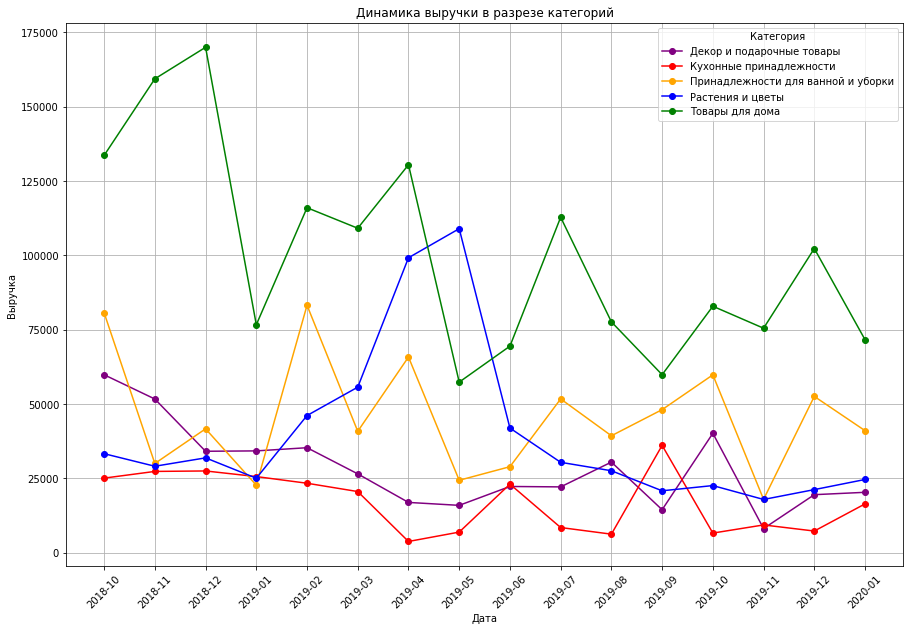

In [ ]:
category_sum = data_new.groupby(['period', 'category'], as_index=False).agg({'revenue': 'sum'})
display(category_sum)

colors = {
    'Растения и цветы': 'blue',
    'Товары для дома': 'green',
    'Кухонные принадлежности': 'red',
    'Принадлежности для ванной и уборки': 'orange',
    'Декор и подарочные товары': 'purple'
}

plt.figure(figsize=(15, 10))
for category in category_sum['category'].unique():
    category_data = category_sum[category_sum['category'] == category]
    plt.plot(category_data['period'].astype('str'), category_data['revenue'],
             label=category, marker='o', color=colors[category])

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Динамика выручки в разрезе категорий')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Категория')
plt.show()

На протяжении почти всего периода лучше всего себя показывают **«Товары для дома» (от 60000 до 175000** на всем протяжении отчетного периода). По этой категории можно увидеть тренд снижения общей выручки. Категория **«Растения и цветы»** показывает небольшой всплеск в **апреле-мае 2019 года - около 100000** (неудивительно, это обычно начало дачного сезона). Категория **«Кухонные принадлежности»** большим спросом никогда не пользовалась **(примерно 5000-35000** на всем протяжении отчетного периода), и является аутсайдером не только по количеству покупок, но и по выручке.

Теперь перейдем к основной цели нашего исследования: сегментирование покупателей с целью определения профилей, для наилучших предложений покупателям от интернет-магазина.

## Основные вопросы исследования

### Проведение сегментации покупателей с помощью RFM-анализа

Для сегментации покупателей воспользуемся RFM-анализом. Нам нужно будет оценить каждого пользователя с точки зрения даты его последней покупки (recency - давность), количества купленной продукции (frequency - частота) и общей выручки (monetary - деньги). Для корректной оценки воспользуемся перцентилями.

Создадим отдельную таблицу для группировки покупателей по нужным показателям.

In [ ]:
customer_data = (data_new.groupby('customer_id', as_index=False)
                 .agg({'date': 'max', 'quantity': 'sum', 'revenue': 'sum'}))
customer_data

,customer_id,date,quantity,revenue
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16 08:00:00,4,555.0
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16 11:00:00,1,442.0
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14 23:00:00,2,914.0
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27 17:00:00,1,1649.0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29 17:00:00,2,2324.0
...,...,...,...,...
2416,ff601403-b094-4b86-9ac6-264d725b9277,2020-01-19 11:00:00,2,1739.0
2417,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,2019-10-31 02:00:00,1,397.0
2418,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,2018-12-15 23:00:00,1,389.0
2419,ffb80538-3fda-4351-8ea9-9d2bec58bb07,2019-09-09 12:00:00,1,974.0


Приступим к первой оценке, а именно давность покупки.

#### Оценка покупателей по давности последней покупки

Для оценки покупателей воспользуемся методом процентилей, и зададим их значения.

In [ ]:
percentiles = [25, 75]

percentile_date = np.percentile(customer_data['date'].view(int), percentiles)
percentile_date_min = pd.to_datetime(percentile_date[0])
percentile_date_max = pd.to_datetime(percentile_date[1])

Мы получили границы дат, по которым будем определять давность:
- с начала отчетного периода до 25-го процентиля - давние клиенты (1 балл)
- между 25-ым и 75-ым процентилями - недавние клиенты (2 балла)
- с 75-го процентиля до конца отчетного периода - только пришедшие клиенты (3 балла)

Теперь, добавим оценки для покупателей в датафрейм. Для каждого показателя будем создавать отдельный столбец.

In [ ]:
def categorize_recency(date):
    if date < percentile_date_min:
        return 1
    elif percentile_date_min <= date < percentile_date_max:
        return 2
    elif date >= percentile_date_max:
        return 3

customer_data['recency'] = customer_data['date'].apply(categorize_recency)
customer_data

,customer_id,date,quantity,revenue,recency
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16 08:00:00,4,555.0,2
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16 11:00:00,1,442.0,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14 23:00:00,2,914.0,2
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27 17:00:00,1,1649.0,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29 17:00:00,2,2324.0,2
...,...,...,...,...,...
2416,ff601403-b094-4b86-9ac6-264d725b9277,2020-01-19 11:00:00,2,1739.0,3
2417,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,2019-10-31 02:00:00,1,397.0,2
2418,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,2018-12-15 23:00:00,1,389.0,1
2419,ffb80538-3fda-4351-8ea9-9d2bec58bb07,2019-09-09 12:00:00,1,974.0,2


Столбец со значениями создан, перейдем к следующей оценке.

#### Оценка покупателей по частоте покупок

Посмотрим на количество повторений уникальных значений количества товаров, которые приобретали покупатели.

In [ ]:
customer_data.groupby('quantity', as_index=False)['customer_id'].count()

,quantity,customer_id
0,1,755
1,2,940
2,3,187
3,4,89
4,5,60
5,6,40
6,7,26
7,8,25
8,9,19
9,10,56


Так как покупатели чаще всего приобретали 1 или 2 товара, изменим значения процентилей для этой оценки с целью корректного распределения покупателей.

In [ ]:
percentiles_count = [35, 75]
percentile_count = np.percentile(customer_data['quantity'], percentiles_count)

percentile_count_min = percentile_count[0]
percentile_count_max = percentile_count[1]

Мы получили границы значений, по которым будем определять частоту:
- с 0 до 35-го процентиля - единоразовый визит (1 балл)
- между 35-ым и 75-ым процентилями - редкие клиенты (2 балла)
- с 75-го процентиля до 100 - постоянные покупатели (3 балла)

Добавим оценки для покупателей в датафрейм.

In [ ]:
def categorize_frequency(count):
    if count < percentile_count_min:
        return 1
    elif percentile_count_min <= count < percentile_count_max:
        return 2
    elif count >= percentile_count_max:
        return 3

customer_data['frequency'] = customer_data['quantity'].apply(categorize_frequency)
customer_data

,customer_id,date,quantity,revenue,recency,frequency
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16 08:00:00,4,555.0,2,3
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16 11:00:00,1,442.0,1,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14 23:00:00,2,914.0,2,2
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27 17:00:00,1,1649.0,1,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29 17:00:00,2,2324.0,2,2
...,...,...,...,...,...,...
2416,ff601403-b094-4b86-9ac6-264d725b9277,2020-01-19 11:00:00,2,1739.0,3,2
2417,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,2019-10-31 02:00:00,1,397.0,2,1
2418,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,2018-12-15 23:00:00,1,389.0,1,1
2419,ffb80538-3fda-4351-8ea9-9d2bec58bb07,2019-09-09 12:00:00,1,974.0,2,1


Столбец со второй оценкой создан, приступим к последней, третьей, оценке.

#### Оценка покупателей по полученной суммарной выручке

In [ ]:
percentile_sum = np.percentile(customer_data['revenue'], percentiles)

percentile_sum_min = percentile_sum[0]
percentile_sum_max = percentile_sum[1]

Мы получили границы значений, по которым будем определять выручку:
- с 0 до 25-го процентиля - небольшая сумма покупки (1 балл)
- между 25-ым и 75-ым процентилями - средние затраты (2 балла)
- с 75-го процентиля до 100 - траты крупных сумм (3 балла)

Добавим оценки для покупателей в датафрейм.

In [ ]:
def categorize_monetary(revenue):
    if revenue < percentile_sum_min:
        return 1
    elif percentile_sum_min <= revenue < percentile_sum_max:
        return 2
    elif revenue >= percentile_sum_max:
        return 3

customer_data['monetary'] = customer_data['revenue'].apply(categorize_monetary)
customer_data

,customer_id,date,quantity,revenue,recency,frequency,monetary
0,000d6849-084e-4d9f-ac03-37174eaf60c4,2019-10-16 08:00:00,4,555.0,2,3,2
1,001cee7f-0b29-4716-b202-0042213ab038,2019-02-16 11:00:00,1,442.0,1,1,2
2,00299f34-5385-4d13-9aea-c80b81658e1b,2019-10-14 23:00:00,2,914.0,2,2,2
3,002d4d3a-4a59-406b-86ec-c3314357e498,2019-01-27 17:00:00,1,1649.0,1,1,2
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2019-09-29 17:00:00,2,2324.0,2,2,3
...,...,...,...,...,...,...,...
2416,ff601403-b094-4b86-9ac6-264d725b9277,2020-01-19 11:00:00,2,1739.0,3,2,2
2417,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,2019-10-31 02:00:00,1,397.0,2,1,2
2418,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,2018-12-15 23:00:00,1,389.0,1,1,2
2419,ffb80538-3fda-4351-8ea9-9d2bec58bb07,2019-09-09 12:00:00,1,974.0,2,1,2


Мы закончили оценку покупателей методом RFM-анализа, теперь добавим эти оценки в основной датафрейм.

In [ ]:
columns_to_add = ['recency', 'frequency', 'monetary']

data_new = (
    pd.merge(data_new, customer_data[['customer_id'] + columns_to_add], on='customer_id', how='left')
)
data_new

,date,customer_id,order_id,product,quantity,price,revenue,period,product_word,category,recency,frequency,monetary
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10,Комнатное,Растения и цветы,1,3,2
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,2018-10,Комнатное,Растения и цветы,1,3,2
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,Радермахера,Растения и цветы,1,3,2
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10,Хризолидокарпус,Растения и цветы,1,3,2
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10,Циперус,Растения и цветы,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0,76.0,2020-01,томата,Растения и цветы,3,3,2
5499,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01,Дендробиум,Растения и цветы,3,2,3
5500,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0,354.0,2020-01,Подставка,Товары для дома,3,2,2
5501,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0,128.0,2020-01,Тагетис,Растения и цветы,3,2,2


#### Сегментация покупателей

Столбцы в основной датафрейм добавились корректно, теперь сегментируем каждого покупателя. В нашем исследовании будем определять сегменты по первой оценке, то есть давности покупки.

In [ ]:
def categorize_section(recency):
    if recency == 1:
        return 'Ушедшие клиенты'
    elif recency == 2:
        return 'Неактивные клиенты'
    elif recency == 3:
        return 'Постоянные клиенты'

data_new['section'] = data_new['recency'].apply(categorize_section)
data_new

,date,customer_id,order_id,product,quantity,price,revenue,period,product_word,category,recency,frequency,monetary,section
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10,Комнатное,Растения и цветы,1,3,2,Ушедшие клиенты
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,2018-10,Комнатное,Растения и цветы,1,3,2,Ушедшие клиенты
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10,Радермахера,Растения и цветы,1,3,2,Ушедшие клиенты
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10,Хризолидокарпус,Растения и цветы,1,3,2,Ушедшие клиенты
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10,Циперус,Растения и цветы,1,3,2,Ушедшие клиенты
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5498,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0,76.0,2020-01,томата,Растения и цветы,3,3,2,Постоянные клиенты
5499,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,2020-01,Дендробиум,Растения и цветы,3,2,3,Постоянные клиенты
5500,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0,354.0,2020-01,Подставка,Товары для дома,3,2,2,Постоянные клиенты
5501,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0,128.0,2020-01,Тагетис,Растения и цветы,3,2,2,Постоянные клиенты


Новый столбец с сегментами создан, а значит можно приступать к анализу сегментов.

### Анализ сегментов

#### Анализ сегментов по количеству покупателей

Посчитаем количество покупателей в каждом сегменте.

In [ ]:
data_new.groupby('section', as_index=False)['customer_id'].nunique()

,section,customer_id
0,Неактивные клиенты,1210
1,Постоянные клиенты,606
2,Ушедшие клиенты,605


Как мы видим, деление покупателей на сегменты произошло корректно. По 25% покупателей **(605 и 606 человек)** оказались в сегментах «Ушедшие клиенты» и «Постоянные клиенты» соответственно. А 50% покупателей **(1210 человек)** - в сегменте «Неактивные клиенты».

Теперь проанализируем сегменты по среднему чеку.

#### Анализ сегментов по среднему чеку

In [ ]:
avg_section = (data_new.groupby(['period', 'section'], as_index=False)
                       .agg({'order_id': 'nunique', 'revenue': 'sum'}))
avg_section['avg'] = (avg_section['revenue'] / avg_section['order_id']).round(0)
avg_section

,period,section,order_id,revenue,avg
0,2018-10,Неактивные клиенты,68,84207.000000,1238.0
1,2018-10,Ушедшие клиенты,168,248332.000000,1478.0
2,2018-11,Неактивные клиенты,67,81109.000000,1211.0
3,2018-11,Ушедшие клиенты,135,216375.000000,1603.0
4,2018-12,Неактивные клиенты,79,84770.000000,1073.0
5,2018-12,Постоянные клиенты,45,51609.000000,1147.0
6,2018-12,Ушедшие клиенты,153,168779.000000,1103.0
7,2019-01,Неактивные клиенты,7,10226.000000,1461.0
8,2019-01,Постоянные клиенты,48,49340.000000,1028.0
9,2019-01,Ушедшие клиенты,110,124706.000000,1134.0


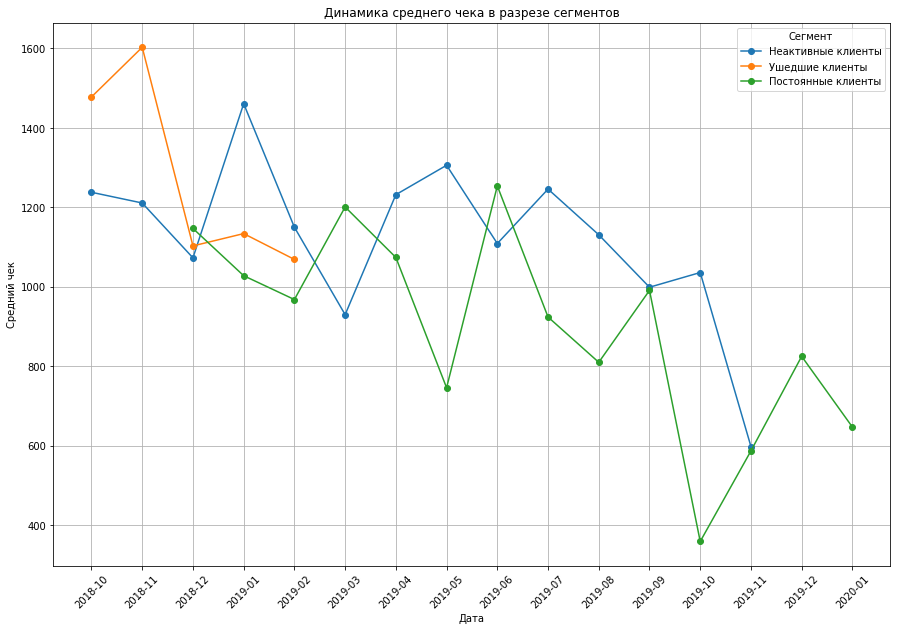

In [ ]:
plt.figure(figsize=(15, 10))
for section in avg_section['section'].unique():
    section_data = avg_section[avg_section['section'] == section]
    plt.plot(section_data['period'].astype('str'), section_data['avg'], label=section, marker='o')

plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Динамика среднего чека в разрезе сегментов')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Сегмент')
plt.show()

На графике видно, что сегмент «Ушедшие клиенты» до своего ухода **(февраль 2019)** имел самый высокий средний чек **(1600),** так что, магазин мог потерять платежеспособных клиентов. Следом идет сегмент «Неактивные клиенты» с максимальным значением в **январе 2019 (около 1450).** Сегмент «Постоянные клиенты» почти на всем протяжении отчетного периода показывал себя хуже всех. Максимальное значение установлено в **июне 2019 - около 1250.**

Теперь посмотрим, какие категории и товары являются самыми популярными для каждого сегмента.

#### Анализ сегментов по основным продуктам и категориям

In [ ]:
category_counts = data_new.groupby(['section', 'category']).size().reset_index(name='count')
popular_category = category_counts.loc[category_counts.groupby('section')['count'].idxmax()]

product_counts = data_new.groupby(['section', 'product']).size().reset_index(name='count')
popular_product = product_counts.loc[product_counts.groupby('section')['count'].idxmax()]

popular_section = pd.merge(popular_category, popular_product, on='section', suffixes=('_category', '_product'))
popular_section

,section,category,count_category,product,count_product
0,Неактивные клиенты,Растения и цветы,2100,Пеларгония розебудная Red Pandora укорененный черенок,43
1,Постоянные клиенты,Растения и цветы,434,Пеларгония розебудная Red Pandora укорененный черенок,20
2,Ушедшие клиенты,Растения и цветы,434,Сумка-тележка 2-х колесная Gimi Argo синяя,18


В построенной таблице мы видим, что для всех сегментов самой популярной категорией является **«Растения и цветы».** Что касается товаров, здесь есть небольшие отличия: для неактивных и постоянных клиентов самым популярным товаром была **«Пеларгония розебудная»** как раз из категории **«Растения и цветы»,** а вот для ушедших клиентов самый популярный товар - **«Сумка-тележка».**

Теперь разберем категории подробнее: посмотрим на популярность для каждого сегмента в динамике, чтобы определить сезонность.

### Анализ категорий товаров и их сезонности по выделенным сегментам покупателей

Для проведения анализа создадим отдельную таблицу, сгруппированную по дате, сегменту и категории, и посчитаем суммарное количество проданных товаров.

In [ ]:
season_data = data_new.groupby(['period', 'section', 'category'], as_index=False)['quantity'].sum()
season_data

,period,section,category,quantity
0,2018-10,Неактивные клиенты,Декор и подарочные товары,81
1,2018-10,Неактивные клиенты,Кухонные принадлежности,4
2,2018-10,Неактивные клиенты,Принадлежности для ванной и уборки,23
3,2018-10,Неактивные клиенты,Растения и цветы,25
4,2018-10,Неактивные клиенты,Товары для дома,37
...,...,...,...,...
156,2020-01,Постоянные клиенты,Декор и подарочные товары,29
157,2020-01,Постоянные клиенты,Кухонные принадлежности,32
158,2020-01,Постоянные клиенты,Принадлежности для ванной и уборки,36
159,2020-01,Постоянные клиенты,Растения и цветы,148


Теперь проанализируем каждый сегмент отдельно.

#### Анализ сегмента «Ушедшие клиенты»

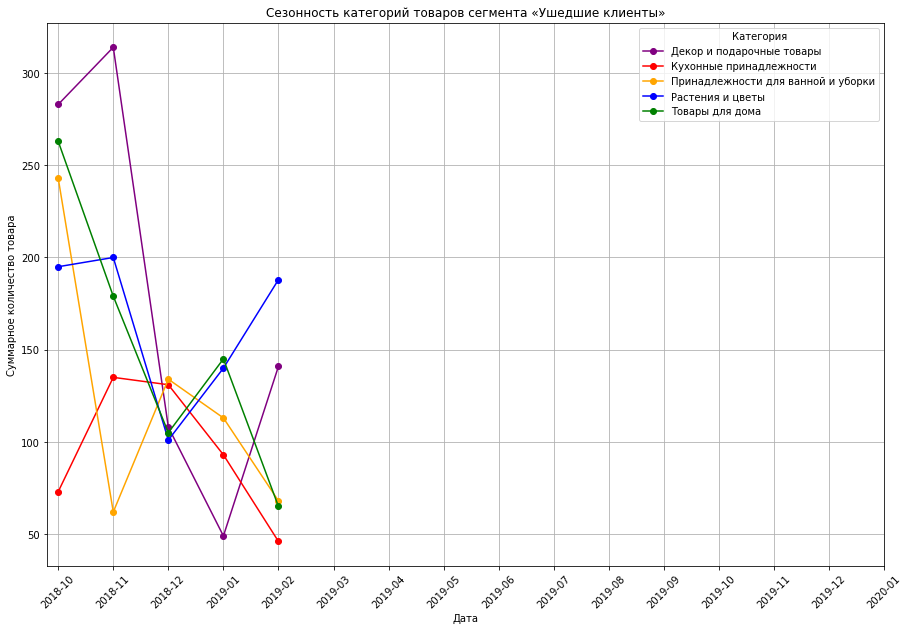

In [ ]:
unique_periods = season_data['period'].unique()

section_gone = season_data.query('section == "Ушедшие клиенты"')

plt.figure(figsize=(15, 10))
for gone in section_gone['category'].unique():
    gone_data = section_gone[section_gone['category'] == gone]
    gone_data = gone_data.set_index('period').reindex(unique_periods).reset_index()
    plt.plot(gone_data['period'].astype('str'), gone_data['quantity'],
             label=gone, marker='o', color=colors[gone])

plt.xlabel('Дата')
plt.ylabel('Суммарное количество товара')
plt.title('Сезонность категорий товаров сегмента «Ушедшие клиенты»')
plt.xticks(ticks=range(len(unique_periods)), labels=unique_periods.astype('str'), rotation=45)
plt.grid(True)
plt.legend(title='Категория')
plt.show()

На графике видно, что из 5 месяцев 2 в сегменте «Ушедшие клиенты» лидировала категория **«Декор и подарочные товары»** (октябрь, ноябрь). В декабре у этой категории произошло значительное снижение, и вперед вырвались категории **«Принадлежности для ванной и уборки» и «Кухонные принадлежности».** В январе соперничали категории **«Товары для дома» и «Растения и цветы».** В феврале единоличным лидером стала категория **«Растения и цветы».**

#### Анализ сегмента «Неактивные клиенты»

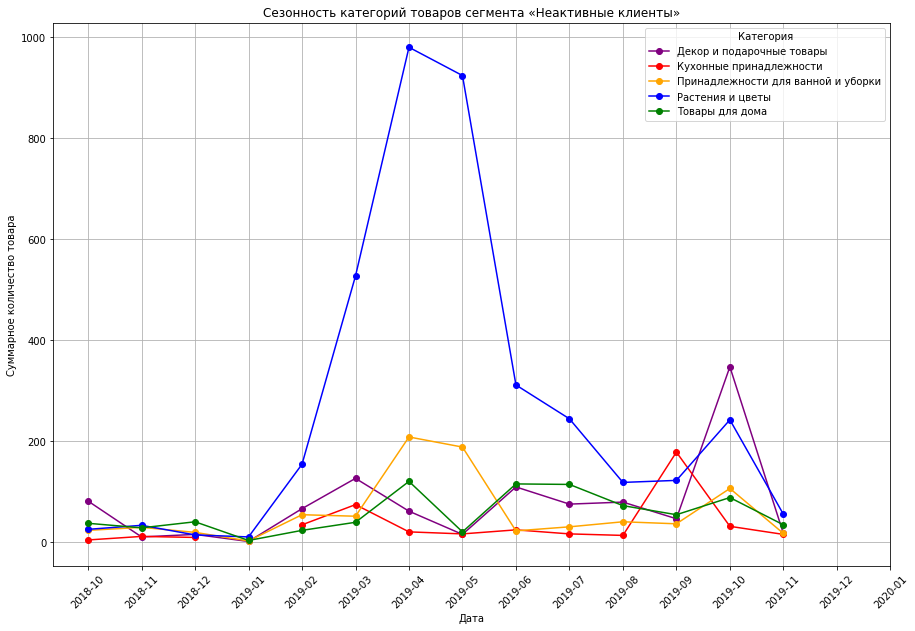

In [ ]:
section_inactive = season_data.query('section == "Неактивные клиенты"')

plt.figure(figsize=(15, 10))
for inactive in section_inactive['category'].unique():
    inactive_data = section_inactive[section_inactive['category'] == inactive]
    inactive_data = inactive_data.set_index('period').reindex(unique_periods).reset_index()
    plt.plot(inactive_data['period'].astype('str'), inactive_data['quantity'],
             label=inactive, marker='o', color=colors[inactive])

plt.xlabel('Дата')
plt.ylabel('Суммарное количество товара')
plt.title('Сезонность категорий товаров сегмента «Неактивные клиенты»')
plt.xticks(ticks=range(len(unique_periods)), labels=unique_periods.astype('str'), rotation=45)
plt.grid(True)
plt.legend(title='Категория')
plt.show()

В сегменте «Неактивные клиенты» с октября 2018 по январь 2019 все категории были примерно равны. Но уже в феврале значительное преимущество получила категория **«Растения и цветы»,** которое достигло своего пика в апреле. В июне категория пошла на спад, однако, все еще удерживала лидерство вплоть до сентября, когда ее опередила категория **«Кухонные принадлежности».** В октябре уже лидировала категория **«Декор и подарочные товары»,** а в ноябре - снова категория **«Растения и цветы»,** с небольшим отрывом.

#### Анализ сегмента «Постоянные клиенты»

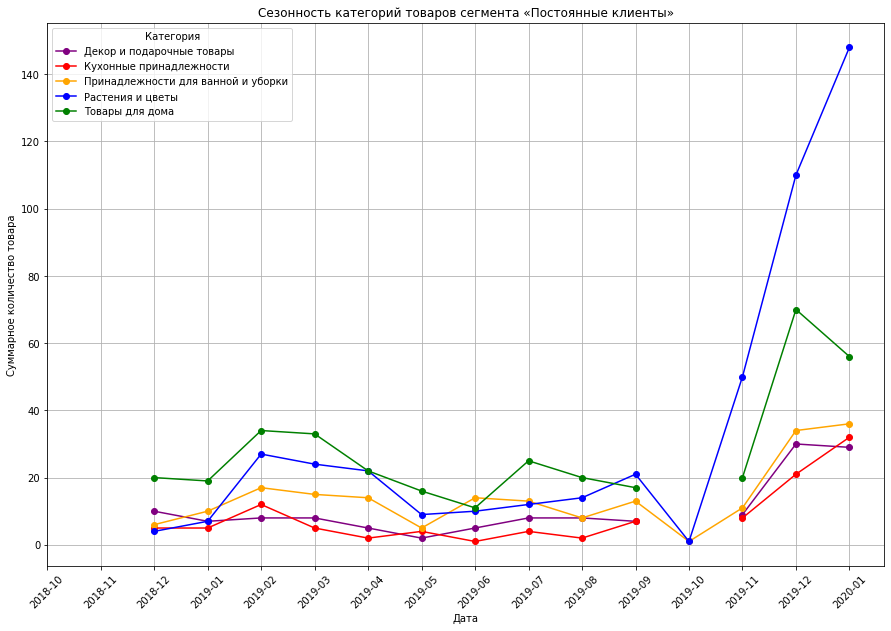

In [ ]:
section_permanent = season_data.query('section == "Постоянные клиенты"')

plt.figure(figsize=(15, 10))
for permanent in section_permanent['category'].unique():
    permanent_data = section_permanent[section_permanent['category'] == permanent]
    permanent_data = permanent_data.set_index('period').reindex(unique_periods).reset_index()
    plt.plot(permanent_data['period'].astype('str'), permanent_data['quantity'],
             label=permanent, marker='o', color=colors[permanent])

plt.xlabel('Дата')
plt.ylabel('Суммарное количество товара')
plt.title('Сезонность категорий товаров сегмента «Постоянные клиенты»')
plt.xticks(ticks=range(len(unique_periods)), labels=unique_periods.astype('str'), rotation=45)
plt.grid(True)
plt.legend(title='Категория')
plt.show()

В сегменте «Постоянные клиенты» категории на всем протяжении отчетного периода показывали себя относительно одинаково. Почти все время лидировала категория **«Товары для дома»,** уступая лишь в нескольких месяцах. Только в конце отчетного периода категория **«Растения и цветы»** показала резкий скачок, нетипичный для этого сегмента. Категория **«Товары для дома»** тоже оказалась в этот период выше, чем в остальные месяцы.

Также, обратим внимание, что в октябре 2019 года покупки в сегменте «Постоянные клиенты» были представлены лишь 2-мя категориями - **«Растения и цветы» и «Принадлежности для ванной и уборки».**

В целом, по суммарному количеству купленного товара можно увидеть, что сегмент «Постоянные клиенты» является самым низким по платежеспособности, в то время как сегменты «Ушедшие клиенты» и «Неактивные клиенты» показывали себя более платежеспособными. Возможно, отсутствие привлекательных предложений для этих категорий послужило причиной их неактивности и ухода. Можно предположить, что если удастся вернуть таких покупателей, чеки покупок вырастут, и, следовательно, вырастет выручка магазина.

Чтобы проверить это предположение, сформулируем и проверим некоторые гипотезы в разрезе сегментов.

## Проверка гипотез

Перед проверкой гипотез определимся с тем, по какому критерию мы будем проверять гипотезы. Наш выбор падет на критерий Манна-Уитни - с его помощью можно сравнить значения двух групп числовых данных, независимых друг от друга. Этот критерий хорошо себя показывает при отсутствии нормального распределения в данных. Также, не забудем применить поправку Бонферрони, так как происходит множественная проверка гипотез (6 попарных сравнений).

Теперь сформулируем гипотезы.

### Расчет статистической значимости различий в суммарной цене покупаемых товаров клиентами между сегментами

Нулевая гипотеза H0: различий в суммарной цене покупаемых товаров клиентами между сегментами **нет.**

Альтернативная гипотеза H1: различия в суммарной цене покупаемых товаров клиентами между сегментами **есть.**

In [ ]:
hypothesis_price = data_new.groupby(['section', 'customer_id'], as_index=False)['price'].sum()
hypothesis_price

,section,customer_id,price
0,Неактивные клиенты,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0
1,Неактивные клиенты,00299f34-5385-4d13-9aea-c80b81658e1b,457.0
2,Неактивные клиенты,003bbd39-0000-41ff-b7f9-2ddaec152037,1162.0
3,Неактивные клиенты,005ba170-45e8-42de-93f7-192481ae2659,4528.0
4,Неактивные клиенты,00e59a12-06d5-47fc-9a33-bfc53aca1e9f,899.0
...,...,...,...
2416,Ушедшие клиенты,fe565a98-0d1f-43f8-98f1-cd8e43c79438,336.0
2417,Ушедшие клиенты,fe7fbb35-03de-4f95-9386-14439d62c03e,187.0
2418,Ушедшие клиенты,fe83266d-760d-4b93-8905-586dd96012b1,1049.0
2419,Ушедшие клиенты,fe99fee2-d40c-4ef9-a589-8679f42076fa,292.0


In [ ]:
# Уровень значимости
alpha = 0.05

# Поправка Бонферрони для трех сравнений
bonferroni_corrected_alpha = alpha / 6

# Сравнение группы 1 и группы 2
group1_price = hypothesis_price[hypothesis_price['section'] == 'Ушедшие клиенты']['price']
group2_price = hypothesis_price[hypothesis_price['section'] == 'Неактивные клиенты']['price']
mw_result_price_1_2 = mannwhitneyu(group1_price, group2_price)

print(f"Сравнение между 'Ушедшие клиенты' и 'Неактивные клиенты':")
print(f"  p-значение: {mw_result_price_1_2.pvalue}")
if mw_result_price_1_2.pvalue < bonferroni_corrected_alpha:
    print("  Значимые различия между 'Ушедшие клиенты' и 'Неактивные клиенты'.")
else:
    print("  Нет значимых различий между 'Ушедшие клиенты' и 'Неактивные клиенты'.")

# Сравнение группы 1 и группы 3
group3_price = hypothesis_price[hypothesis_price['section'] == 'Постоянные клиенты']['price']
mw_result_price_1_3 = mannwhitneyu(group1_price, group3_price)

print(f"Сравнение между 'Ушедшие клиенты' и 'Постоянные клиенты':")
print(f"  p-значение: {mw_result_price_1_3.pvalue}")
if mw_result_price_1_3.pvalue < bonferroni_corrected_alpha:
    print("  Значимые различия между 'Ушедшие клиенты' и 'Постоянные клиенты'.")
else:
    print("  Нет значимых различий между 'Ушедшие клиенты' и 'Постоянные клиенты'.")

# Сравнение группы 2 и группы 3
mw_result_price_2_3 = mannwhitneyu(group2_price, group3_price)

print(f"Сравнение между 'Неактивные клиенты' и 'Постоянные клиенты':")
print(f"  p-значение: {mw_result_price_2_3.pvalue}")
if mw_result_price_2_3.pvalue < bonferroni_corrected_alpha:
    print("  Значимые различия между 'Неактивные клиенты' и 'Постоянные клиенты'.")
else:
    print("  Нет значимых различий между 'Неактивные клиенты' и 'Постоянные клиенты'.")

Сравнение между 'Ушедшие клиенты' и 'Неактивные клиенты':
  p-значение: 0.8681309669687383
  Нет значимых различий между 'Ушедшие клиенты' и 'Неактивные клиенты'.
Сравнение между 'Ушедшие клиенты' и 'Постоянные клиенты':
  p-значение: 8.867814597208147e-28
  Значимые различия между 'Ушедшие клиенты' и 'Постоянные клиенты'.
Сравнение между 'Неактивные клиенты' и 'Постоянные клиенты':
  p-значение: 2.8019168937083367e-36
  Значимые различия между 'Неактивные клиенты' и 'Постоянные клиенты'.


По результатам проверки первой гипотезы можно сделать следующие выводы:
- между ушедшими и неактивными клиентами **нет** статистически значимой разницы в цене покупаемых товаров
- между ушедшими и постоянными клиентами **есть** статистически значимая разница в цене покупаемых товаров
- между неактивными и постоянными клиентами **есть** статистически значимая разница в цене покупаемых товаров

### Расчет статистической значимости различий в суммарном количестве покупаемого товара клиентами между сегментами

Нулевая гипотеза H0: различий в суммарном количестве покупаемого товара клиентами между сегментами **нет.**

Альтернативная гипотеза H1: различия в суммарном количестве покупаемого товара клиентами между сегментами **есть.**

In [ ]:
hypothesis_quantity = data_new.groupby(['section', 'customer_id'], as_index=False)['quantity'].sum()
hypothesis_quantity

,section,customer_id,quantity
0,Неактивные клиенты,000d6849-084e-4d9f-ac03-37174eaf60c4,4
1,Неактивные клиенты,00299f34-5385-4d13-9aea-c80b81658e1b,2
2,Неактивные клиенты,003bbd39-0000-41ff-b7f9-2ddaec152037,2
3,Неактивные клиенты,005ba170-45e8-42de-93f7-192481ae2659,3
4,Неактивные клиенты,00e59a12-06d5-47fc-9a33-bfc53aca1e9f,2
...,...,...,...
2416,Ушедшие клиенты,fe565a98-0d1f-43f8-98f1-cd8e43c79438,4
2417,Ушедшие клиенты,fe7fbb35-03de-4f95-9386-14439d62c03e,2
2418,Ушедшие клиенты,fe83266d-760d-4b93-8905-586dd96012b1,1
2419,Ушедшие клиенты,fe99fee2-d40c-4ef9-a589-8679f42076fa,1


In [ ]:
# Сравнение группы 1 и группы 2
group1_quantity = hypothesis_quantity[hypothesis_quantity['section'] == 'Ушедшие клиенты']['quantity']
group2_quantity = hypothesis_quantity[hypothesis_quantity['section'] == 'Неактивные клиенты']['quantity']
mw_result_quantity_1_2 = mannwhitneyu(group1_quantity, group2_quantity)

print(f"Сравнение между 'Ушедшие клиенты' и 'Неактивные клиенты':")
print(f"  p-значение: {mw_result_quantity_1_2.pvalue}")
if mw_result_quantity_1_2.pvalue < bonferroni_corrected_alpha:
    print("  Значимые различия между 'Ушедшие клиенты' и 'Неактивные клиенты'.")
else:
    print("  Нет значимых различий между 'Ушедшие клиенты' и 'Неактивные клиенты'.")

# Сравнение группы 1 и группы 3
group3_quantity = hypothesis_quantity[hypothesis_quantity['section'] == 'Постоянные клиенты']['quantity']
mw_result_quantity_1_3 = mannwhitneyu(group1_quantity, group3_quantity)

print(f"Сравнение между 'Ушедшие клиенты' и 'Постоянные клиенты':")
print(f"  p-значение: {mw_result_quantity_1_3.pvalue}")
if mw_result_quantity_1_3.pvalue < bonferroni_corrected_alpha:
    print("  Значимые различия между 'Ушедшие клиенты' и 'Постоянные клиенты'.")
else:
    print("  Нет значимых различий между 'Ушедшие клиенты' и 'Постоянные клиенты'.")

# Сравнение группы 2 и группы 3
mw_result_quantity_2_3 = mannwhitneyu(group2_quantity, group3_quantity)

print(f"Сравнение между 'Неактивные клиенты' и 'Постоянные клиенты':")
print(f"  p-значение: {mw_result_quantity_2_3.pvalue}")
if mw_result_quantity_2_3.pvalue < bonferroni_corrected_alpha:
    print("  Значимые различия между 'Неактивные клиенты' и 'Постоянные клиенты'.")
else:
    print("  Нет значимых различий между 'Неактивные клиенты' и 'Постоянные клиенты'.")

Сравнение между 'Ушедшие клиенты' и 'Неактивные клиенты':
  p-значение: 0.8306678337088541
  Нет значимых различий между 'Ушедшие клиенты' и 'Неактивные клиенты'.
Сравнение между 'Ушедшие клиенты' и 'Постоянные клиенты':
  p-значение: 0.07766274680049062
  Нет значимых различий между 'Ушедшие клиенты' и 'Постоянные клиенты'.
Сравнение между 'Неактивные клиенты' и 'Постоянные клиенты':
  p-значение: 0.009368976738732746
  Нет значимых различий между 'Неактивные клиенты' и 'Постоянные клиенты'.


По результатам проверки второй гипотезы можно сделать следующие выводы:
- между ушедшими и неактивными клиентами **нет** статистически значимой разницы в количестве покупаемых товаров
- между ушедшими и постоянными клиентами **нет** статистически значимой разницы в количестве покупаемых товаров
- между неактивными и постоянными клиентами **нет** статистически значимой разницы в количестве покупаемых товаров

По итогам проверки гипотез можно утверждать следующее:
- сегменты **ушедших и неактивных клиентов** являются самыми платежеспособными
- сегмент **постоянных клиентов** приносит меньше всего выручки

Таким образом, мы видим, что из-за потери ушедших и неактивных клиентов выручка интернет-магазина уменьшается. Попробуем сформулировать рекомендации для того, чтобы повысить удержание старых клиентов и привлечение новых.

## Общие выводы

**РЕКОМЕНДАЦИИ ПО МАРКЕТИНГУ** *(в какие месяцы предложения каких категорий рассылать каждому сегменту покупателей)*

***Сегмент «Ушедшие клиенты»*** *(имеются данные только за 5 месяцев)*
- **октябрь:** декор и подарочные товары
- **ноябрь:** декор и подарочные товары
- **декабрь:** принадлежности для ванной и уборки, и кухонные принадлежности
- **январь:** товары для дома, и растения и цветы
- **февраль:** растения и цветы

***Сегмент «Неактивные клиенты»***
- **январь:** растения и цветы
- **февраль:** растения и цветы
- **март:** растения и цветы
- **апрель:** растения и цветы
- **май:** растения и цветы
- **июнь:** растения и цветы
- **июль:** растения и цветы
- **август:** растения и цветы
- **сентябрь:** кухонные принадлежности
- **октябрь:** декор и подарочные товары
- **ноябрь:** растения и цветы
- **декабрь:** товары для дома

***Сегмент «Постоянные клиенты»***
- **январь:** растения и цветы, и товары для дома *(вторая категория вследствие того, что всплеск у постоянных клиентов категории «Растения и цветы» является разовым случаем и не отражает сезонность)*
- **февраль:** товары для дома
- **март:** товары для дома
- **апрель:** товары для дома, и растения и цветы
- **май:** товары для дома
- **июнь:** принадлежности для ванной и уборки
- **июль:** товары для дома
- **август:** товары для дома
- **сентябрь:** растения и цветы
- **октябрь:** растения и цветы, и принадлежности для ванной и уборки
- **ноябрь:** растения и цветы
- **декабрь:** растения и цветы, и товары для дома *(вторая категория вследствие того, что всплеск у постоянных клиентов категории «Растения и цветы» является разовым случаем и не отражает сезонность)*

**СТРАТЕГИЯ УВЕЛИЧЕНИЯ ПРОДАЖ И ПОВЫШЕНИЯ ЛОЯЛЬНОСТИ** *(разработать стратегию по увеличению количества продаваемого товара и предложить способы повышения возвращаемости покупателей для различных сегментов)*

***Сегмент «Ушедшие клиенты»***
- оценка по *Frequency* - 1: на таких клиентов не имеет смысла тратить много ресурсов, можно отправить реакционную рассылку.
- оценка по *Frequency* - 2: таким клиентам можно отправить опрос, который может помочь выявить причины их ухода.
- оценка по *Frequency* - 3: таких клиентов очень выгодно вернуть, поэтому можно отправить рассылку, в которой будет информация о скидках, программе лояльности.

***Сегмент «Неактивные клиенты»***
- оценка по *Frequency* - 1 и 2: таким клиентам можно отправить рассылку со специальными предложениями и акциями.
- оценка по *Frequency* - 3: следует разослать опрос с целью выявить причины неактивности, и добавить к опросу информацию об акциях.

***Сегмент «Постоянные клиенты»***
- оценка по *Frequency* - 1: таким клиентам следует отправить приветственное письмо, и прислать информацию с целью привлечения внимания к продукции магазина.
- оценка по *Frequency* - 2: для таких клиентов можно отправлять рассылку с персональными предложениями товаров.
- оценка по *Frequency* - 3: для клиентов с малым бюджетом - рассылка с персональными предложениями товаров; для клиентов со средним бюджетом - специальные предложения и акции, чтобы заинтересовать; для клиентов с большим бюджетом - информация о специальных программах лояльности или приглашение в VIP-клуб.